# Getting Started With Geospatial Analysis
This notebook walks you through how to get started with analyzing geospatial data. We will start by exploring publicly available geographic datasets and then explore the sentinel dataset available at AWS open data registry. For geographic data analysis, we explore California Lakes and for the geospatial example we will narrow down to Lake Shasta in California.

## Install Packages
Install require packages or use the YAML file to build a custom environment that has the required packages for the notebook

In [219]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%pip install pandas
%pip install numpy
%pip install geopandas
%pip install shapely
%pip install matplotlib
%pip install folium
%pip install plotly_express
%pip install sentinelhub
%pip install rasterio
%pip install earthpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 127 kB 950 kB/s eta 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Packages
In this section, we will first import packages required for our geographic analysis section.

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import os

## Download Data
Download shapely files that include the geographic data for California counties and water bodies. 
- The CA Counties dataset contains boundaries for CA State, counties and places from the US Census Bureau's 2016 MAF/TIGER database available at https://data.ca.gov/dataset/ca-geographic-boundaries . 
- The California water bodies dataset is published by California. Department of Fish and Game. Marine Resources Region and is available for download here - https://maps.princeton.edu/download/file/stanford-zx543xm6802-shapefile.zip 

After the files are downloaded, we need to unzip these in your local directories.


In [18]:
# Download and extract California counties dataset

ca_base_url = 'https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/b0007416-a325-4777-9295-368ea6b710e6/download/'
ca_data_file = 'ca-county-boundaries.zip'

if not os.path.isfile(ca_data_file):
    !wget {ca_base_url}{ca_data_file}
    !unzip {ca_data_file}

# Download and extract California lakes dataset

lakes_base_url = 'https://maps.princeton.edu/download/file/'
lakes_data_file = 'stanford-zx543xm6802-shapefile.zip'
if not os.path.isfile(lakes_data_file):
    !wget {lakes_base_url}{lakes_data_file}
    !unzip {lakes_data_file} -d ca_lakes

## Geographic EDA
We start off by loading the counties shape data file into a geopandas dataframe

In [21]:
file = 'CA_Counties/CA_Counties_TIGER2016.shp'
counties = gpd.read_file(file)

In [29]:
# data check
counties.shape

(58, 18)

In [30]:
# data cheeck
counties.head()

STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND      AWATER  \
0      H1  G4020  None   None     None        A  2468694587    23299110   
1      H1  G4020   472  40900     None        A  2499183617    76073827   
2      H1  G4020  None  42200     None        A  7084000598  2729814515   
3      H1  G4020  None   None     None        A  2641820834    43806026   
4      H1  G4020   348  37100     None        A  4773390489   945942791   

      INTPTLAT      INTPTLON  \
0  +39.5769252  -120.5219926   
1  +38.4500114  -121.3404409   
2  +34.5370572  -120.0399729   
3  +38.1838996  -120.5614415   
4  +34.3587415  -119.1331432   

                                            geometry  
0  POLYGON ((-13431319.751 4821511.426, -13431312...  
1  POLYGON ((-13490651.476 4680831.603, -13490511...  
2  MULTIPOLYGON (((-13423116.772 4042044.149, -13...  
3  POLYGON ((-13428575.483 4627725.228, -13428534...  
4  MULTIPOLYGON (((-13317853.594 3931602.414, -13...

Once you have the data geopandas you can easily visualize it

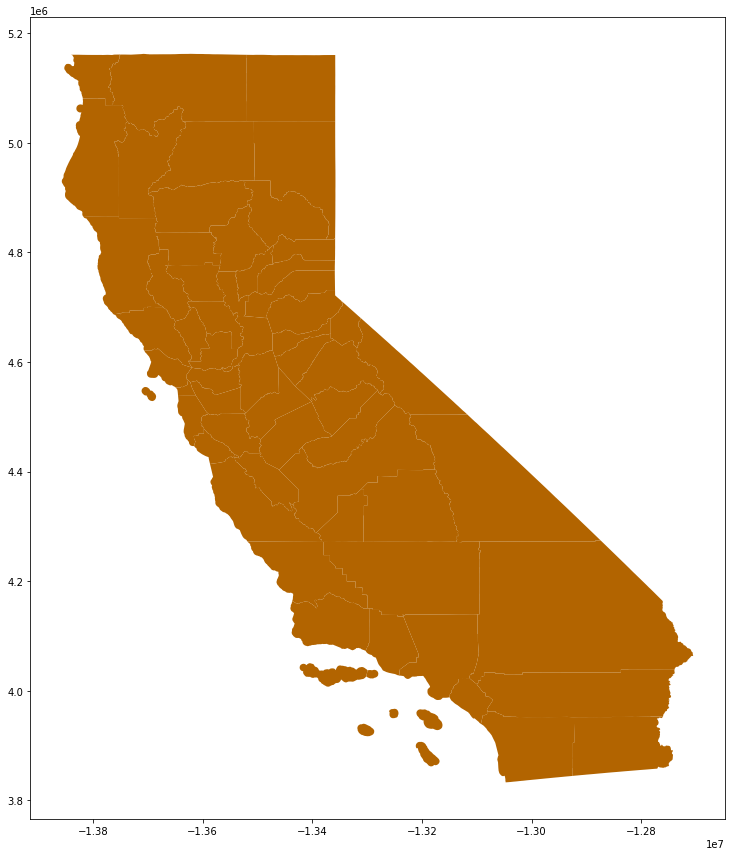

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
counties.plot(ax=ax,color='xkcd:umber')
plt.tight_layout()
plt.show()

Similarly we will load the California lakes shape files into a geopandas dataframe and visualize it

In [32]:
file = 'ca_lakes/zx543xm6802.shp'
lakes = gpd.read_file(file)

In [33]:
# data check
lakes.shape

(27506, 17)

In [34]:
# data check
lakes.head()

dfgwaterid       type         name    gnis_name    gnis_id     county  \
0           2       None         None         None        0.0   Siskiyou   
1           5  perennial  Azalea Lake  Azalea Lake   256390.0   Siskiyou   
2           9       None   White Lake   White Lake   269006.0   Siskiyou   
3          35       None  Bear Wallow  Bear Wallow   256730.0  Del Norte   
4          39       None     Mud Lake     Mud Lake  1657412.0   Siskiyou   

            quad_name quad_code  lat_nad83   lon_nad83  utm_zone  \
0     COTTONWOOD PEAK   41122H6  41.995514 -122.634687      10.0   
1     FIGUREHEAD MTN.   41123H3  41.969883 -123.300531      10.0   
2  LOWER KLAMATH LAKE   41121H6  41.994778 -121.633244      10.0   
3     BROKEN RIB MTN.   41123H6  41.950329 -123.654790      10.0   
4              DORRIS   41121H8  41.985547 -121.983720      10.0   

      utm_n_n83      utm_e_n83        mtr  elev_ft   sfc_acres  \
0  4.649343e+06  530256.529651  M48N  07W     2832   12.647377   
1  4.646476e+06  475099.025138  H18N  08E     5383    4.601394   
2  4.650100e+06  613201.864414  M48N  03E     4093  814.471819   
3  4.644469e+06  445729.565005  H18N  05E     4380    0.292219   
4  4.648671e+06  584185.392854  M48N  01W     4763   11.463147   

                                            geometry  
0  POLYGON Z ((-122.63289 41.99307 0.00000, -122....  
1  POLYGON Z ((-123.30003 41.96928 0.00000, -123....  
2  MULTIPOLYGON Z (((-121.64562 41.99941 0.00000,...  
3  POLYGON Z ((-123.65462 41.95016 0.00000, -123....  
4  POLYGON Z ((-121.98280 41.98446 0.00000, -121....

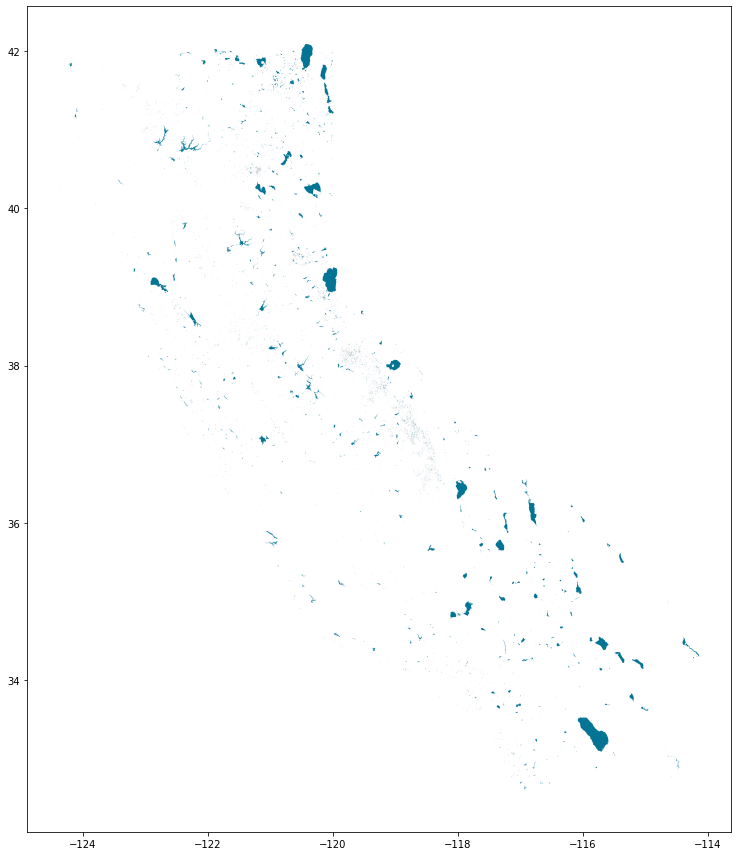

In [35]:
# visualize
fig, ax = plt.subplots(figsize=(12,12))
lakes.plot(ax=ax, color='xkcd:sea blue')
plt.tight_layout()
plt.show()

## Data Wrangling
Before can overlay geographic data, we need to check and ensure they are projected using the same coordinate reference system (CRS). In our case the California counties and lakes data have different CRS. We will re-project the lakes to have the same CRS as counties.

In [38]:
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
lakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [220]:
# re-project lakes to same counties CRS epsg:3857
lakes_projected = lakes.to_crs({'init': 'epsg:3857'})

Once you have both the geographic datasets in the same CRS projection, you can overlay them. In this example we will overlay the lakes over California counties and visualize them

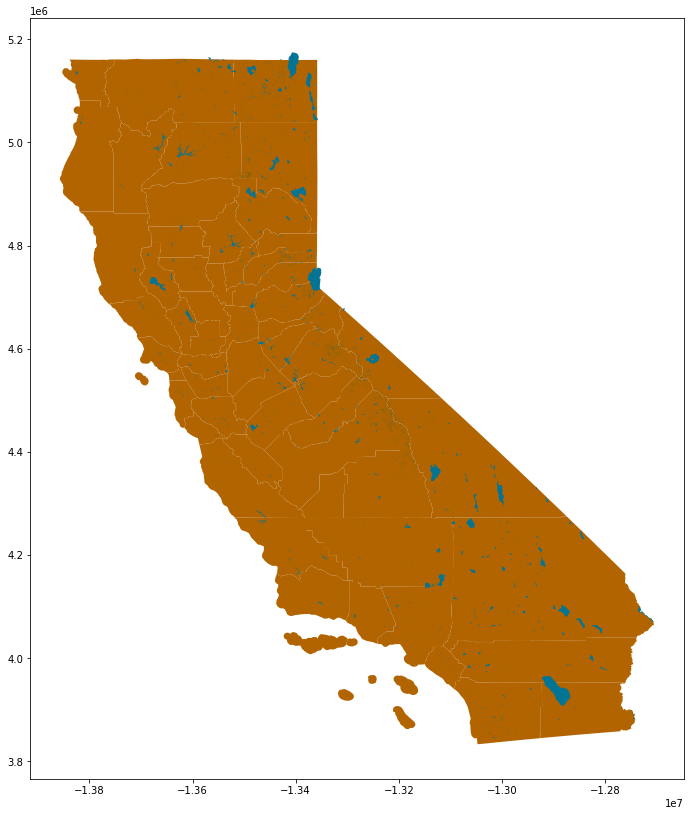

In [41]:
# visualize overlay
fig, ax = plt.subplots(figsize=(14,14))
counties.plot(ax=ax,color='xkcd:umber')
lakes_projected.plot(markersize=1, color='xkcd:sea blue',ax=ax)
plt.show()

Next, we will select select a specific example, in our case Lake Shasta from the lakes dataset. 

In [15]:
shasta = lakes_projected[lakes_projected['name'] == "Lake Shasta"]

In [16]:
shasta.head()

dfgwaterid       type         name    gnis_name   gnis_id  county  \
1218         784  perennial  Lake Shasta  Shasta Lake  253897.0  Shasta   

     quad_name quad_code  lat_nad83   lon_nad83  utm_zone    utm_n_n83  \
1218   O'BRIEN   40122G3  40.765934 -122.298688      10.0  4513010.636   

        utm_e_n83        mtr  elev_ft     sfc_acres  \
1218  559189.7561  M34N  04W     1069  28355.438839   

                                               geometry  
1218  MULTIPOLYGON Z (((-13618707.923 4990067.530 0....

Once we have our area of interest selected, it becomes easy to visualize and study it better.

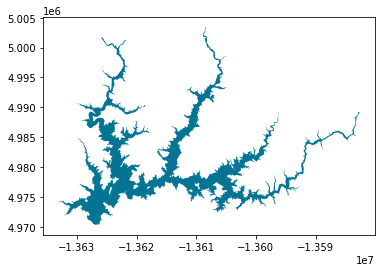

In [17]:
shasta.plot(color='xkcd:sea blue');

## Working With Geospatial Images
Here we move on from from geographic data to analysis geospatial images. We will the free public Sentinel-2 dataset available at AWS open data registry (https://registry.opendata.aws/sentinel-2/). For this section you will need 
- AWS Free Tier account (https://aws.amazon.com/free/) 
- Free trail account from Sentinel hub (https://www.sentinel-hub.com/)

We configure the `sentinelhub` package with credentials needed to search the dataset and download the required tiles from AWS open data registry 

In [46]:
from sentinelhub import SHConfig
config = SHConfig()

In [227]:
import json

with open("config.json") as json_data_file:
    cfg = json.load(json_data_file)

In [231]:
# instance_id - Instance ID from from your Sentinel Hub account 
# aws_access_key_id - Access key ID from your AWS account
# aws_secret_access_key - Secrect access key from your AWS account

config.instance_id = cfg["sentinelhub"]["instance_id"]
config.aws_access_key_id = cfg["aws"]["access_key_id"]
config.aws_secret_access_key = cfg["aws"]["secret_access_key"]

In [232]:
# Save the configuration

config.save()

In [233]:
# Verify credentials

from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig
if config.instance_id == '':
    print("Warning! To use WFS functionality, please configure the `instance_id`.")

#### Data Search
Before we can start searching, we need to specify the bounding box coordinates for our area of interest and the time interval that we are interested. In our case we are focusing on the Lake Shasta region and a random time period.

In [234]:
# Specify bounding box and time interval for search

search_bbox = BBox(bbox=[-123.050516,37.845040,-122.523172,38.249508], crs=CRS.WGS84)

search_time_interval = ('2019-08-01T00:00:00', '2019-08-15T23:59:59')


wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_collection=DataCollection.SENTINEL2_L1C,
    maxcc=1.0,
    config=config
)

for tile_info in wfs_iterator:
    print(tile_info)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[-123.49596888938702, 37.94653523329623], [-123.77992687706502, 36.95532883423918], [-122.89037933316587, 36.95783951164065], [-122.88892538948096, 37.947528129469475], [-123.49596888938702, 37.94653523329623]]]]}, 'properties': {'id': 'S2B_OPER_MSI_L1C_TL_SGS__20190813T204954_A012723_T10SDG_N02.08', 'date': '2019-08-13', 'time': '19:04:19', 'path': 's3://sentinel-s2-l1c/tiles/10/S/DG/2019/8/13/0', 'crs': 'EPSG:32610', 'mbr': '399960,4090200 509760,4200000', 'cloudCoverPercentage': 0}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'coordinates': [[[[-123.00021625365561, 37.94758055791956], [-123.00021342293302, 36.95789010852225], [-121.76700583572769, 36.9514885996532], [-121.75065723902449, 37.940947339443376], [-123.00021625365561, 37.94758055

In [55]:
# List available tiles

wfs_iterator.get_tiles()

[('10SDG', '2019-8-13', 0),
 ('10SEG', '2019-8-13', 0),
 ('10SDH', '2019-8-13', 0),
 ('10SEH', '2019-8-13', 0),
 ('10SDG', '2019-8-11', 0),
 ('10SEG', '2019-8-11', 0),
 ('10SDH', '2019-8-11', 0),
 ('10SEH', '2019-8-11', 0),
 ('10SDG', '2019-8-8', 0),
 ('10SEG', '2019-8-8', 0),
 ('10SDH', '2019-8-8', 0),
 ('10SEH', '2019-8-8', 0),
 ('10SDG', '2019-8-6', 0),
 ('10SEG', '2019-8-6', 0),
 ('10SDH', '2019-8-6', 0),
 ('10SEH', '2019-8-6', 0),
 ('10SDG', '2019-8-3', 0),
 ('10SEG', '2019-8-3', 0),
 ('10SDH', '2019-8-3', 0),
 ('10SEH', '2019-8-3', 0),
 ('10SDG', '2019-8-1', 0),
 ('10SEG', '2019-8-1', 0),
 ('10SDH', '2019-8-1', 0),
 ('10SEH', '2019-8-1', 0)]

#### Picking Tiles

We will pick a tile that has low cloud coverage to get best results

In [57]:
from sentinelhub import AwsTile

tile_id = 'S2A_OPER_MSI_L1C_TL_VGS2_20200815T224802_A026894_T10TEL_N02.09'
tile_name, time, aws_index = AwsTile.tile_id_to_tile(tile_id)
tile_name, time, aws_index

('10TEL', '2020-8-15', 0)

#### Sentinel Data Download
Now that we have narrowed down on the tiles we like, we can download them locally. Sentinel tiles include varous bands, for now we will download 8 specific bands that will aid us in our analysis. Check here (https://en.wikipedia.org/wiki/Sentinel-2#Spectral_bands) for more information on Sentinel bands

In [115]:
from sentinelhub import AwsTileRequest

bands = ['B01','B02','B03','B04','B07','B08','B8A', 'B10','B11','B12']
metafiles = ['tileInfo', 'preview', 'qi/MSK_CLOUDS_B00']
data_folder = './AwsData'

request = AwsTileRequest(
    tile=tile_name,
    time=time,
    aws_index=aws_index,
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder,
    data_collection=DataCollection.SENTINEL2_L1C
)

request.save_data()

/Users/sampal/anaconda3/envs/datascience/lib/python3.8/site-packages/sentinelhub/aws.py:167: SHUserWarning: Products with baseline 02.09 are not officially supported in sentinelhub-py. If you notice any errors in naming structure of downloaded data please report an issue at https://github.com/sentinel-hub/sentinelhub-py/issues. Pull requests are also very appreciated
  warnings.warn(message, category=SHUserWarning)


In [116]:
#Parse the request response 

data_list = request.get_data(redownload=True)

p_b01,p_b02,p_b03,p_b04,p_b07,p_b08,p_b8a,p_b10,p_b11,p_b12,p_tile_info, p_preview, p_cloud_mask = data_list

#### Visualize Raw Data
Along with the spectral bands, Sentinel tiles also include a preview image, lets check that out first to make sure we have the area of interest captured clearly.

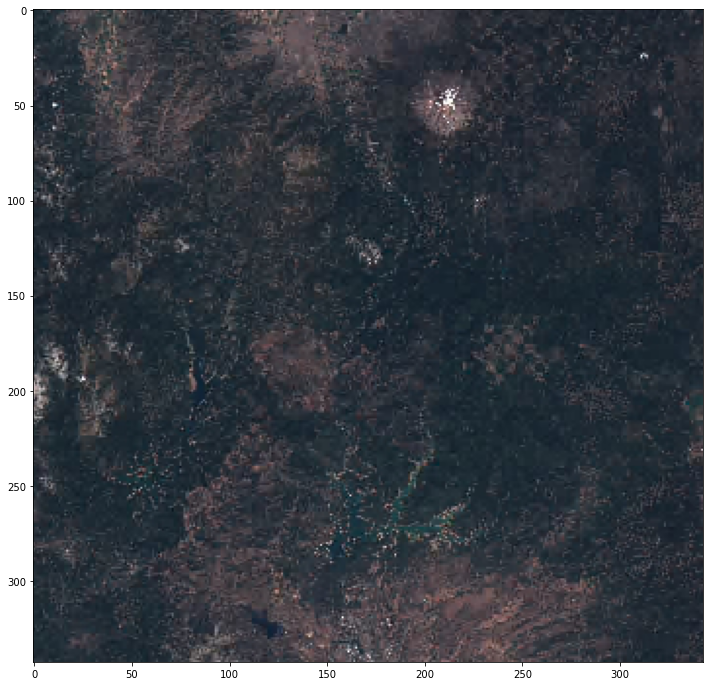

In [61]:
# Preview 

plt.figure(figsize = (12,12))
plt.imshow(p_preview,aspect='auto');

Next, lets visualize some additional bands - Here we plot Band 7 – Vegetation red edge, Band 8 – NIR and Band 8A – Narrow NIR

<Figure size 2592x864 with 0 Axes>

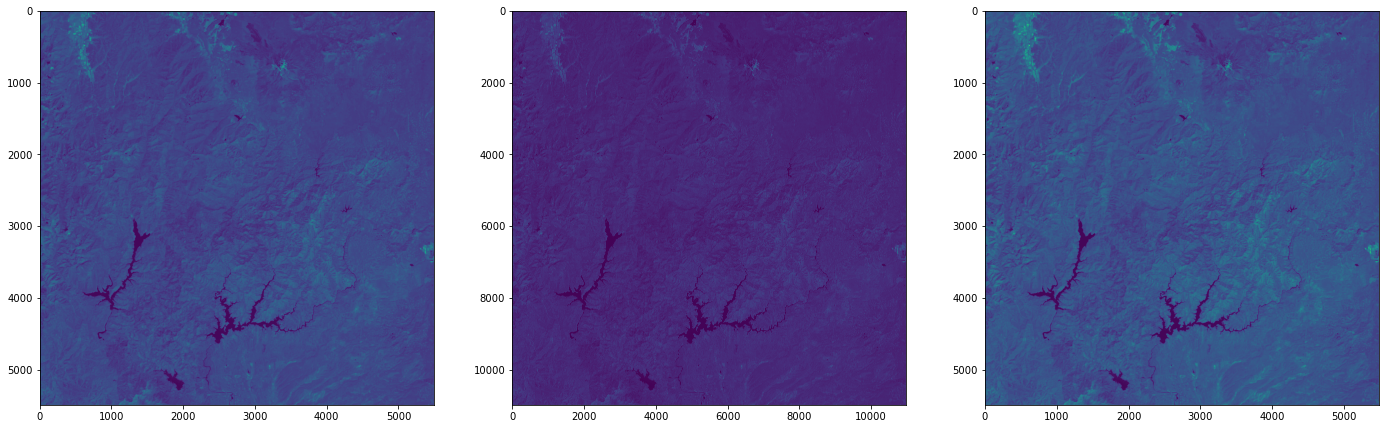

In [74]:
plt.figure(figsize = (36,12))
f, axarr = plt.subplots(1,3,figsize = (24,12))
axarr[0].imshow(p_b07)
axarr[1].imshow(p_b08)
axarr[2].imshow(p_b8a)

## Working with Raster Data
Geospatial data is essentially comprised of raster data or vector data. Sentinel-2 uses GeoTIFF, a gridded raster datasets for satellite imagery and terrain models. Rasterio is a Python library that allows to read, inspect, visualize and write geospatial raster data. Here we use `rasterio` to read thee raster arrays and then use this data to create a true color image.

In [75]:
import rasterio

For getting to the true color images, we will need the blue, green, red and NIR bands.

In [76]:
# Reeading the required bands with rasterio

band2 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B02.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B03.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B04.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B08.jp2', driver='JP2OpenJPEG') #nir

We now use `rasterio` to create a true color image in .tiff format. A true color image has a large file size, please ensure you have at least 2+ GBs of free disk space before exporting.

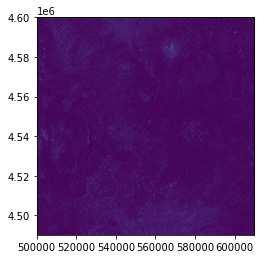

In [84]:
#export true color image
trueColor = rasterio.open('./AwsData/lake_shasta.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

src = rasterio.open(r"./AwsData/lake_shasta.tiff", count=3)
plot.show(src);

As you see visualizing a tiff image directly within Jupyter is not very helpful. You will need a GIS software to open and view this. Below in a example that was processed using QGIS

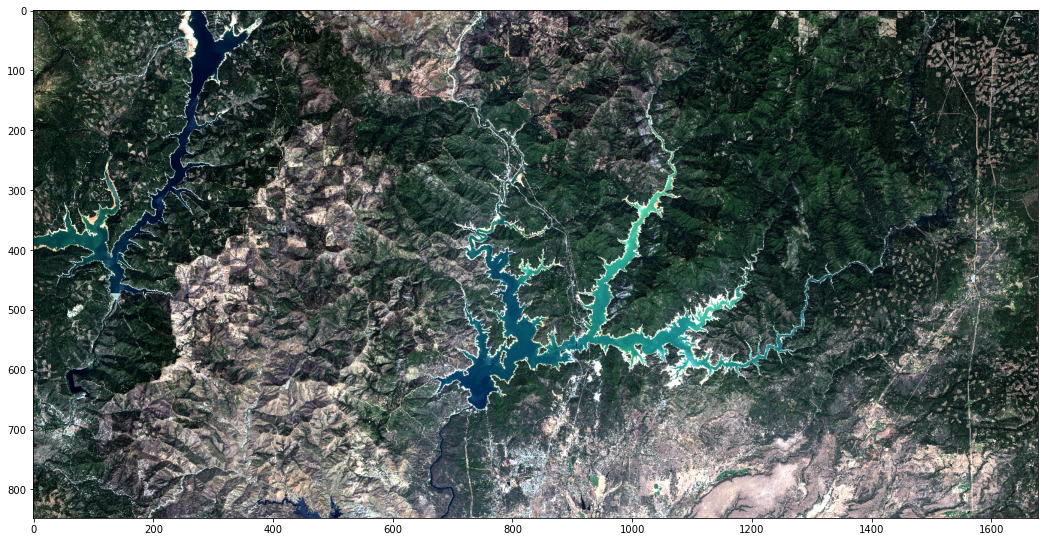

In [85]:
import matplotlib.image as mpimg
plt.figure(figsize = (18,18))
img = mpimg.imread('./images/lake_shasta.png')
imgplot = plt.imshow(img)
plt.show()

## Calculating Land Cover Indexes
Land cover data documents how much of a region is covered by forests, wetlands, impervious surfaces, agriculture, and other land and water types. 

#### Normalized Difference Vegetation Index - NVDI
The normalized difference vegetation index is a simple graphical indicator that can be used to analyze whether or not the target being observed contains live green vegetation. 

It calculated as `NDVI = (NIR – Red) / (NIR + Red)`

In [86]:
import earthpy.spatial as es
import earthpy.plot as ep

In [215]:
b4 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B04.jp2')
b8 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B08.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()
ndvi = (nir.astype(float)-red.astype(float))/(nir.astype(float)+red.astype(float))

In [216]:
title = "Normalized Difference Vegetation Index (NDVI)"

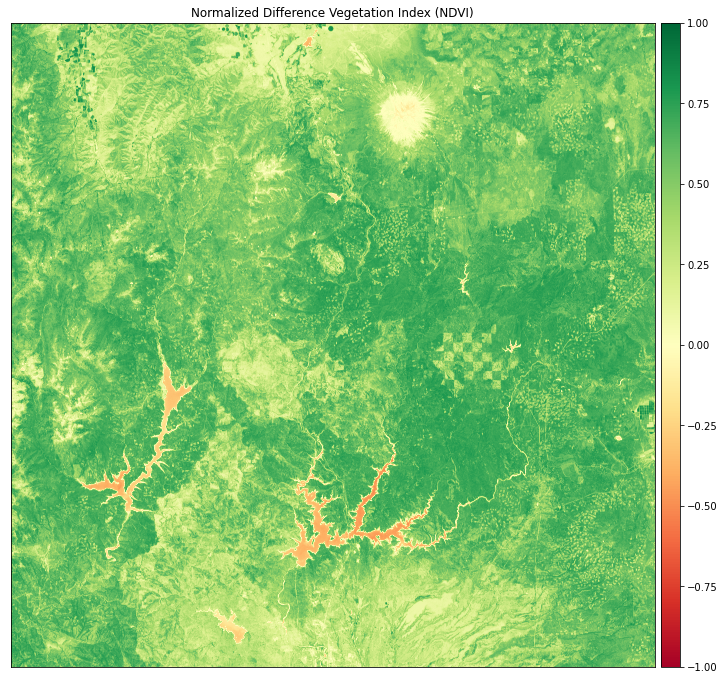

In [217]:
title = "Normalized Difference Vegetation Index (NDVI)"
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=title, vmin=-1, vmax=1);

#### Normalized Difference Water Index - NDWI
Normalize Difference Water Index (NDWI) is use for the water bodies analysis. The index uses Green and Near infra-red bands of remote sensing images. The NDWI can enhance water information efficiently in most cases.

NDWI is calculated as `NDWI = (GREEEN – NIR) / (GREEN + NIR)`

In [211]:
b3 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B03.jp2')
b8 = rasterio.open('./AwsData/10TEL,2020-08-15,0/B08.jp2')
# read Gree(b4) annd NIR(b8) as arrays
green = b3.read()
nir = b8.read()
ndwi = (green.astype(float)-nir.astype(float))/(green.astype(float)+nir.astype(float))

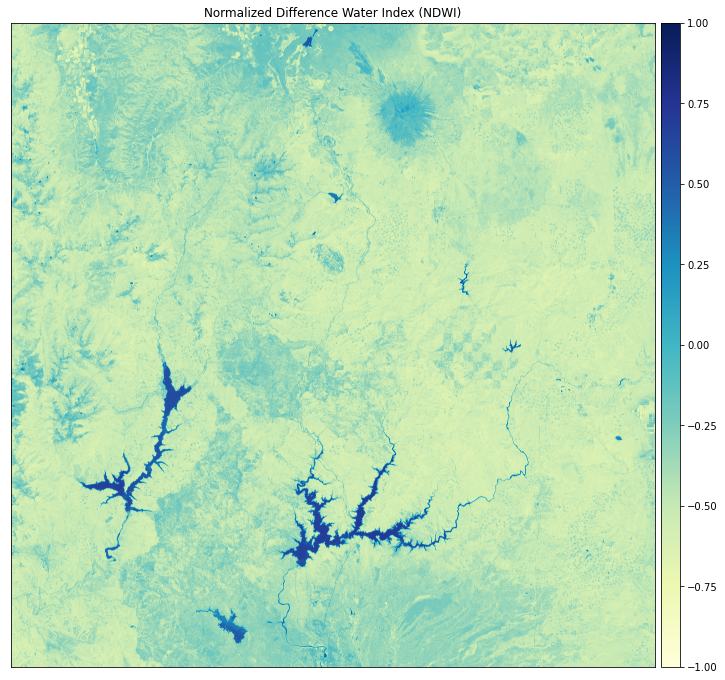

In [213]:
title = "Normalized Difference Water Index (NDWI)"
ep.plot_bands(ndwi, cmap='YlGnBu', cols=1, title=title, vmin=-1, vmax=1); #cmap='YlGnBu'

## Clean Up (Optional)
Though we did not create any billable resources as part of this exercise, the geographic and GIS data that you downloaded and the images generated may take up significant storage. Make sure to check any storage utilization and delete the files as needed.